# Домашнее задание "Функции потерь и оптимизация"

Реализовать самостоятельно логистическую регрессию.

Обучить ее методом градиентного спуска.

Методом nesterov momentum.

Методом rmsprop.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X, y = make_blobs(n_samples=100, centers=[[-2, 0.5], [2, -0.5]], n_features=2, random_state=42)


In [3]:
X.shape

(100, 2)

In [4]:
y

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

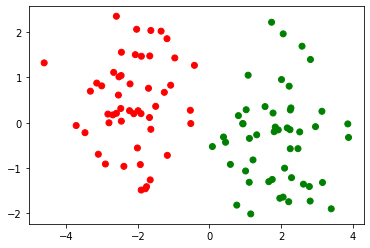

In [5]:


colors = ['red', 'green']

colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.scatter(X[:, 0], X[:, 1], c=colored_y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    stratify=y)

In [7]:
np.mean(y_train), np.mean(y_test)

(0.5, 0.5)

Логистическая регрессия

Вычисление предсказания логистической регрессией для объекта $x_i \in \mathbb{R}^n$ :

$z = w^T x_i + b, \quad w \in \mathbb{R}^n, b \in \mathbb{R}$

$y_{pred} = a = \sigma (z)$

Сигмоида

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
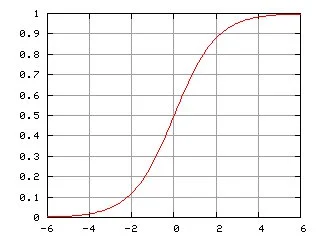

Логистическая фунция потерь:

$$L_i(a) = -y_i \cdot log(a) - (1 - y_i) \cdot log(1 - a)$$
Производные функции по параметрам:

$$\frac{\partial L_i}{\partial w} = (a-y_i) \cdot x_i $$$$
\frac{\partial L_i}{\partial b} = a-y_i $$
Используются для минимизации функции потерь $L$ с помощью градиентного спуска.

In [8]:
m, n = X_train.shape

w = np.random.randn(n)
b = np.random.randn()


In [9]:
# def log_loss(y_true, y_pred):
#     return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred), axis=0) / len(y_true)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# def predict(x, w, b):
#     return np.array(sigmoid(np.dot(w, x) + b)) >= threshold


### Логистическая регрессия (Метод стохастического градиентного спуска)

In [10]:
EPOCHS = 12
LEARNING_RATE = 0.0001
threshold = 0.5

losses = []
y_preds = []
w = np.random.randn(n)
b = np.random.randn()

for _ in range(EPOCHS):
    # предсказание модели
    y_pred = np.array(sigmoid(-1*(X_train.dot(w.T) + b)))
    y_preds.append(y_pred)
                      
    # функция потерь
    log_loss = -np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred), axis=0) / len(y_train)
    losses.append(log_loss)
    
    i = np.random.choice(len(X_train))
    current_prediction = sigmoid(X_train[i].dot(w) + b)

    b -= LEARNING_RATE * (current_prediction - y_train[i])
    w -= LEARNING_RATE * ((current_prediction - y_train[i]) * X_train[i])

In [11]:
w, b

(array([-0.65648922, -1.59654148]), -0.7585099815385467)

In [12]:
y_pred, y_train

(array([0.88271054, 0.06865234, 0.9245366 , 0.30973488, 0.81279326,
        0.58634121, 0.4559179 , 0.46044797, 0.94989163, 0.83601029,
        0.71884486, 0.87988507, 0.57840293, 0.3602194 , 0.08372186,
        0.7681623 , 0.05368711, 0.15437155, 0.941366  , 0.44223314,
        0.99569033, 0.58073423, 0.82340371, 0.93806605, 0.83596991,
        0.42943471, 0.4608247 , 0.92860073, 0.90609619, 0.18937916,
        0.9421942 , 0.492842  , 0.0870236 , 0.42232298, 0.13276311,
        0.06585574, 0.62548062, 0.06020199, 0.79261196, 0.73143855,
        0.51574107, 0.14343814, 0.86454295, 0.99426892, 0.45887715,
        0.91275345, 0.58453867, 0.35142229, 0.23767797, 0.85417828,
        0.95690029, 0.0874197 , 0.91737496, 0.35096976, 0.59544993,
        0.79120528, 0.46810598, 0.4892477 , 0.59022336, 0.79728022,
        0.86878094, 0.78985299, 0.4220062 , 0.51997746, 0.67358106,
        0.69024528, 0.9496039 , 0.43025776, 0.96175233, 0.47734157]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,

### Логистическая регрессия (Метод Nesterov momentum)

In [13]:
EPOCHS = 12
LEARNING_RATE = 0.0001
gamma = 0.9
threshold = 0.5

losses = []
y_preds = []
vt_b = []
vt_w = []
w = np.random.randn(n)
b = np.random.randn()
vt_b = [0 for _ in range(len(X_train))]
vt_w = [0 for _ in range(len(X_train))]

for i in range(EPOCHS):
    # предсказание модели
    y_pred = np.array(sigmoid(-1*(X_train.dot(w.T) + b)))
    y_preds.append(y_pred)
                      
    # функция потерь
    log_loss = -np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred), axis=0) / len(y_train)
    losses.append(log_loss)
    
    i = np.random.choice(len(X_train))
    current_prediction = sigmoid(X_train[i].dot(w) + b)
    
    vt_b[i] = gamma*vt_b[i] + LEARNING_RATE*np.sum(current_prediction- y_train[i]) / len(y_train)
    vt_w[i] = gamma*vt_w[i] + LEARNING_RATE*np.sum((current_prediction - y_train[i])*X_train[i]) / len(y_train)

    b -= vt_b[i]
    w -= vt_w[i]

In [14]:
w, b

(array([-0.60409832, -1.15293564]), 0.9307713412086637)

In [15]:
y_pred, y_train

(array([0.44086697, 0.02321813, 0.56863924, 0.08121358, 0.47573679,
        0.19437238, 0.13532772, 0.14055397, 0.6205779 , 0.48311037,
        0.34169605, 0.56259749, 0.28713764, 0.16714939, 0.02633975,
        0.39124739, 0.02191114, 0.07195023, 0.69461681, 0.19293504,
        0.93567116, 0.27977049, 0.43493504, 0.55472741, 0.34933183,
        0.12197101, 0.22675836, 0.68110164, 0.59608022, 0.0578601 ,
        0.73917282, 0.1841112 , 0.02969276, 0.12137045, 0.03606832,
        0.02602776, 0.25783531, 0.02422851, 0.40378752, 0.28519891,
        0.1463558 , 0.0372264 , 0.40442264, 0.92962403, 0.09997683,
        0.60314571, 0.29532755, 0.14467719, 0.07776161, 0.51192404,
        0.64215317, 0.03268551, 0.53345745, 0.15876804, 0.21973019,
        0.40257246, 0.1382532 , 0.25580983, 0.23925876, 0.34740196,
        0.50490247, 0.44292742, 0.10546866, 0.14039148, 0.36694802,
        0.22783582, 0.60565268, 0.17503872, 0.77872692, 0.211436  ]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,

### Логистическая регрессия (Метод RMSProp)

In [16]:
EPOCHS = 12
LEARNING_RATE = 0.0001
gamma = 0.9
threshold = 0.5
e = 10**-6

losses = []
y_preds = []
vt_b = []
vt_w = []
w = np.random.randn(n)
b = np.random.randn()
Eg2_b = [0 for _ in range(len(X_train))]
Eg2_w = [0 for _ in range(len(X_train))]

for i in range(EPOCHS):
    # предсказание модели
    y_pred = np.array(sigmoid(-1*(X_train.dot(w.T) + b)))
    y_preds.append(y_pred)
                      
    # функция потерь
    log_loss = -np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred), axis=0) / len(y_train)
    losses.append(log_loss)
    
    i = np.random.choice(len(X_train))
    current_prediction = sigmoid(X_train[i].dot(w) + b)
    
    Eg2_b[i] = gamma * Eg2_b[i] + (1-gamma) * (np.sum(current_prediction- y_train[i]) / len(y_train)) **2
    Eg2_w[i] = gamma * Eg2_w[i] + (1-gamma) * (np.sum((current_prediction - y_train[i]) * X_train[i]) / len(y_train)) **2

    b -= (LEARNING_RATE * np.sum(current_prediction- y_train[i]) / len(y_train)) / np.sqrt(Eg2_b[i]+ e)
    w -= (LEARNING_RATE * np.sum(current_prediction- y_train[i]) / len(y_train) * X_train[i]) / np.sqrt(Eg2_b[i]+ e)

In [17]:
w, b

(array([-0.67369873, -1.96632358]), 1.5668234721662149)

In [21]:
y_pred, y_train

(array([0.55215935, 0.00486833, 0.65501082, 0.04289742, 0.26371091,
        0.13367457, 0.07864444, 0.07795853, 0.78281042, 0.32317074,
        0.1830539 , 0.41276077, 0.07827347, 0.02910501, 0.00650341,
        0.23075346, 0.00308713, 0.00856721, 0.64798798, 0.04694696,
        0.98142201, 0.08245938, 0.32862755, 0.75402767, 0.45913795,
        0.07243972, 0.04418551, 0.56419216, 0.51266785, 0.01763188,
        0.6014927 , 0.07259624, 0.00622353, 0.06903496, 0.01282861,
        0.00394968, 0.12757045, 0.00352737, 0.2737844 , 0.25026048,
        0.1110109 , 0.01478225, 0.50950802, 0.97066998, 0.11094926,
        0.5449633 , 0.07890644, 0.03211788, 0.02236498, 0.35807864,
        0.81741891, 0.00567329, 0.64425135, 0.02865217, 0.12402991,
        0.27147009, 0.08397938, 0.04683026, 0.10788578, 0.33881263,
        0.42267184, 0.2359018 , 0.08019965, 0.11958473, 0.11555259,
        0.2348025 , 0.79175769, 0.04818931, 0.739982  , 0.05469986]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,